# Mengumpulkan dan Eksplorasi Data Audio

Nama : Qoid Rif'at

NIM : 210411100160

Kelas : Proyek Sains Data (A)

In [ ]:
pip install librosa

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/psd a

/content/drive/MyDrive/psd a


In [ ]:
import librosa
x, sr = librosa.load("data audio.wav")

Text(0.5, 1.0, 'Audio')

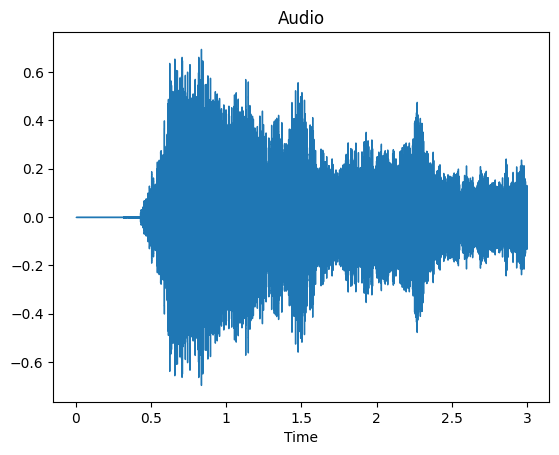

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
x, sr = librosa.load("data audio.wav")
librosa.display.waveshow (x, sr=sr)
plt.title("Audio")

In [ ]:
x.shape

(66150,)

In [ ]:
x[66148]

0.00079345703

In [ ]:
import numpy as np
import scipy

In [ ]:
freqs = np.fft.fftfreq(x.size)

def describe_freq(freqs):
  mean = np.mean(freqs)
  minv = np.amin(freqs)
  maxv = np.amax(freqs)
  std = np.std(freqs)
  median = np.median(freqs)
  skew = scipy.stats.skew(freqs)
  kurt = scipy.stats.kurtosis(freqs)

In [ ]:
freqs.shape

(66150,)

In [ ]:
freqs[66148]

-3.023431594860166e-05

In [ ]:
mean = np.mean(freqs)
mean

-7.55857898714338e-06

In [ ]:
median = np.median(freqs)
median

-7.558578987150415e-06

In [ ]:
minv = np.min(freqs)
minv

-0.5

In [ ]:
skew = scipy.stats.skew(freqs)
skew

-3.2403495130059895e-18

In [ ]:
maxv = np.amax(freqs)
maxv

0.4999848828420257

In [ ]:
kurt = scipy.stats.kurtosis(freqs)
kurt

-1.2000000005484677

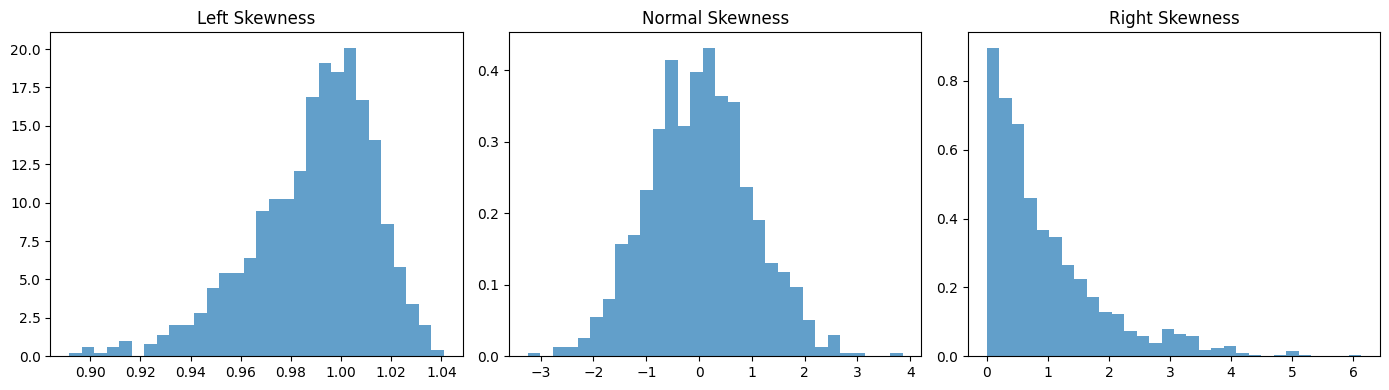

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, gamma
np.random.seed(42)

# generate normal, left-skewed, and right-skewed samples
normal_freqs = np.random.normal(loc=0, scale=1, size=1000)
left_freqs = np.random.weibull(50,1000)
right_freqs = gamma.rvs(a=1, size=1000)

# plot these
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
axs[0].hist(left_freqs, bins=30, density=True, alpha=0.7)
axs[0].set_title("Left Skewness")
axs[1].hist(normal_freqs, bins=30, density=True, alpha=0.7)
axs[1].set_title("Normal Skewness")
axs[2].hist(right_freqs, bins=30, density=True, alpha=0.7)
axs[2].set_title("Right Skewness")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.stats import shapiro
from scipy.stats import kstest

stat, p = shapiro(normal_freqs)
print("Shapiro-Wilk test for normal distribution:")
print("Statistical value:", stat, ", p-value:", p)

stat, p = shapiro(left_freqs)
print("Shapiro-Wilk test for skewed distribution:")
print("Statistical value:", stat, ", p-value:", p)

stat, p = shapiro(right_freqs)
print("Shapiro-Wilk test for skewed distribution:")
print("Statistical value:", stat, ", p-value:", p)

# Perform the Kolmogorov-Smirnov test on each data set
stat, p = kstest(normal_freqs, 'norm')
print("Kolmogorov-Smirnov test for normal distribution:")
print("Statistical value:", stat, ", p-value:", p)

stat, p = kstest(left_freqs, 'norm')
print("Kolmogorov-Smirnov test for skewed distribution:")
print("Statistical value:", stat, ", p-value:", p)

stat, p = kstest(right_freqs, 'norm')
print("Kolmogorov-Smirnov test for skewed distribution:")
print("Statistical value:", stat, ", p-value:", p)

Shapiro-Wilk test for normal distribution:
Statistical value: 0.9986080527305603 , p-value: 0.6264819502830505
Shapiro-Wilk test for skewed distribution:
Statistical value: 0.9578495621681213 , p-value: 2.266444967544346e-16
Shapiro-Wilk test for skewed distribution:
Statistical value: 0.8390923738479614 , p-value: 1.307680477323667e-30
Kolmogorov-Smirnov test for normal distribution:
Statistical value: 0.017327787320720822 , p-value: 0.9196626608357358
Kolmogorov-Smirnov test for skewed distribution:
Statistical value: 0.8147488205807106 , p-value: 0.0
Kolmogorov-Smirnov test for skewed distribution:
Statistical value: 0.5000046416228398 , p-value: 1.0533070064799348e-231


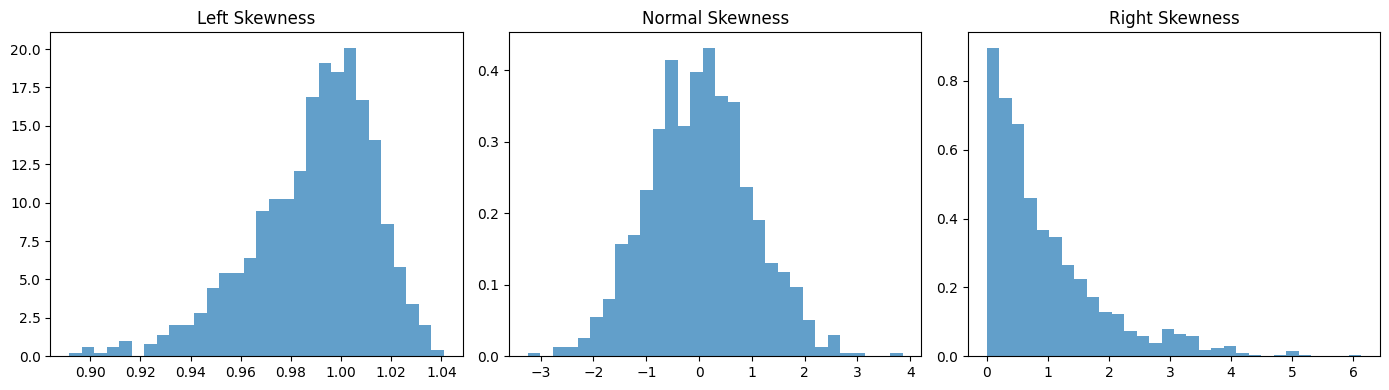

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, gamma
np.random.seed(42)

# generate normal, left-skewed, and right-skewed samples
normal_freqs = np.random.normal(loc=0, scale=1, size=1000)
left_freqs = np.random.weibull(50,1000)
right_freqs = gamma.rvs(a=1, size=1000)

# calculate the skewness of each using the Pearson method
n_skewness = skew(normal_freqs)
r_skewness = skew(right_freqs)
l_skewness = skew(left_freqs)

# plot these
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))
axs[0].hist(left_freqs, bins=30, density=True, alpha=0.7)
axs[0].set_title("Left Skewness")
axs[1].hist(normal_freqs, bins=30, density=True, alpha=0.7)
axs[1].set_title("Normal Skewness")
axs[2].hist(right_freqs, bins=30, density=True, alpha=0.7)
axs[2].set_title("Right Skewness")
plt.tight_layout()
plt.show()

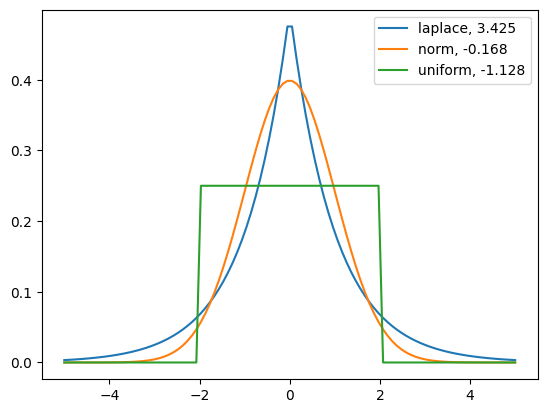

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis

x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']
for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()

In [ ]:
import librosa
x, sr = librosa.load("data audio.wav")

In [ ]:
skewness = scipy.stats.skew(freqs)

if skewness > 0:
    print("Positif skewness:", skewness)
elif skewness < 0:
    print("Negatif skewness:", skewness)
else:
    print("Simetris")


Positif skewness: 1.635377725133219
